In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


plt.rcParams["figure.figsize"] = (15,7.5)
plt.rcParams.update({'font.size': 20})
plt.rcParams["legend.fontsize"] = (15)

In [159]:
#CONTI Import dataframe from csv
df = pd.read_csv('OCT6 EO Raw Overall Data.csv', sep=',', engine='python')
df_cb = df[~df.Series.str.contains('TB Bond Vibration')]

#reset index #
N = len(df_cb.index)
df_cb.reset_index()
df_cb['Time'] = df_cb.Time.str[11:19]

#Rearrange Columns
cols = df_cb.columns.tolist()
cols = cols[-1:] + cols[:-1];

#df_cb.to_excel('df_cb.xlsx',  sheet_name='Continuous Bond')

#TACKDOWN Import dataframe from csv
#df = pd.read_csv('OCT6 EO Raw Overall Data.csv', sep=',', engine='python')
#df_td = df[~df.Series.str.contains('CB Bond Vibration')]

#reset index #
#N = len(df_td.index)
#df_td.reset_index()
#df_td['Time'] = df_td.Time.str[11:19]

#Rearrange Columns
#cols = df_td.columns.tolist()
#cols = cols[-1:] + cols[:-1];

#df_td = df_td.reset_index(drop=True)
#df_td.to_excel('df_td.xlsx',  sheet_name='Tackdown Bond')

<ipython-input-159-5706e2725da9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cb['Time'] = df_cb.Time.str[11:19]


#Average all measurements within the same second
second_averages = pd.DataFrame()

new_index=0
count=1
val_sum=0
data=[]

for i in range(0, len(df_cb.index)-1):
    #Check the time stamp is the same
    if df_cb.iloc[i, 1] ==  df_cb.iloc[i+1, 1]:
        #Add all the values in the time stamp
        count=count+1
        val_sum += df_cb.iloc[i, 2]
    else:
        val_sum += df_cb.iloc[i, 2]
        data.append(val_sum/count)
        count=1
        val_sum=0

second_averages = second_averages.append(data,ignore_index=True)
second_averages = second_averages.rename(columns={0:"Average Values (G)"})

compression_opts = dict(method='zip',
                        archive_name='df_cb.csv')  
second_averages.to_excel('df_cb.zip', index=True,
          compression=compression_opts)

print('Done')

#Average all measurements within the same second
second_averages = pd.DataFrame()

new_index=0
count=1
val_sum=0
data=[]

for i in range(0, len(df_td.index)-1):
    #Check the time stamp is the same
    if df_td.iloc[i, 1] ==  df_td.iloc[i+1, 1]:
        #Add all the values in the time stamp
        count=count+1
        val_sum += df_td.iloc[i, 2]
    else:
        val_sum += df_td.iloc[i, 2]
        data.append(val_sum/count)
        count=1
        val_sum=0

second_averages = second_averages.append(data,ignore_index=True)
second_averages = second_averages.rename(columns={0:"Average Values (G)"})

second_averages.to_csv(index=True)

print('Done')

# Continuous Bond

#### Runs for the B condition

B1 - Target Pressure (2.3 Bar) 09:25:54 -> 09:30:54

B2 - Low Pressure (.80) 09:37:04 -> 09:41:42

B3 - Very Low Pressure (.60) 09:56:02 -> 10:00:46

B4 - Target Pressure 

In [160]:
df_cb.index[df_cb['Time'] == '09:25:54'];

In [161]:
df_cb.index[df_cb['Time'] == '09:30:55'];

In [162]:
df_cb.index[df_cb['Time'] == '09:37:04'];

In [163]:
df_cb.index[df_cb['Time'] == '09:41:42'];

In [164]:
df_cb.index[df_cb['Time'] == '09:56:02'];

In [165]:
df_cb.index[df_cb['Time'] == '10:00:46'];

In [166]:
df_cb.index[df_cb['Time'] == '18:23:10'];

In [167]:
df_cb.index[df_cb['Time'] == '18:30:12'];

In [168]:
B1 = df_cb.loc[246541:250000]
m = B1['Value (G)'].mean()
std = np.std(B1['Value (G)'])
number_std = 3
ucl = m + number_std*std
lcl = m - number_std*std
B1 = B1.assign(Mean=m)
B1 = B1.reset_index(drop=True)

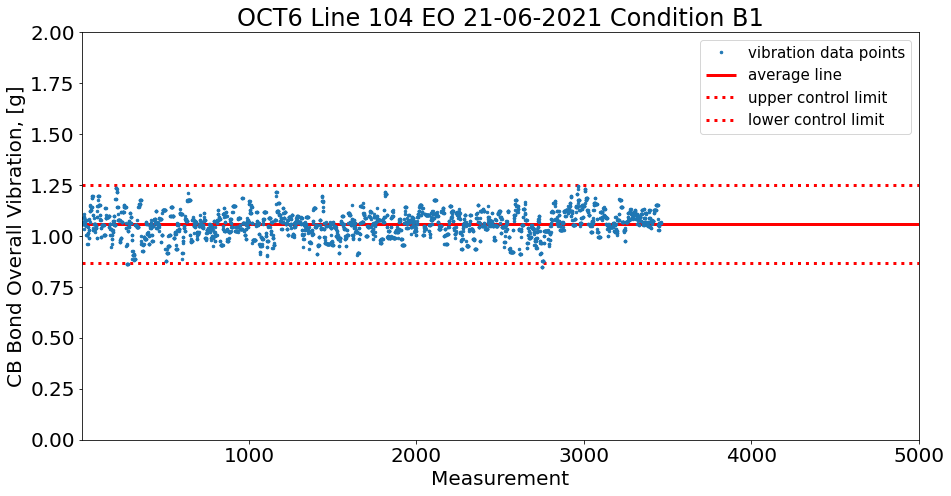

In [169]:
x = B1.index
y = B1['Value (G)']
m = B1['Mean']
fig, ax = plt.subplots()
ax.set_xlim(1, 5000)
ax.set_ylim(0, 2)
plt.plot(x, y, '.', markersize=5, label='vibration data points')
plt.hlines(y=m, xmin=0, xmax=5000, colors='r', linewidths=3, label='average line')
plt.hlines(y=ucl, xmin=0, xmax=5000, colors='r', linewidths=3, linestyles='dotted', label='upper control limit')
plt.hlines(y=lcl, xmin=0, xmax=5000, colors='r', linewidths=3, linestyles='dotted', label='lower control limit')
plt.title('OCT6 Line 104 EO 21-06-2021 Condition B1')
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right')

#### B2 - Low Pressure (0.80)
Define the B2 and B3 dataframce. 
Graph these lines in the same plot with B1 to 

In [170]:
B2 = df_cb.loc[257881:262000]
B2 = B2.reset_index(drop=True)

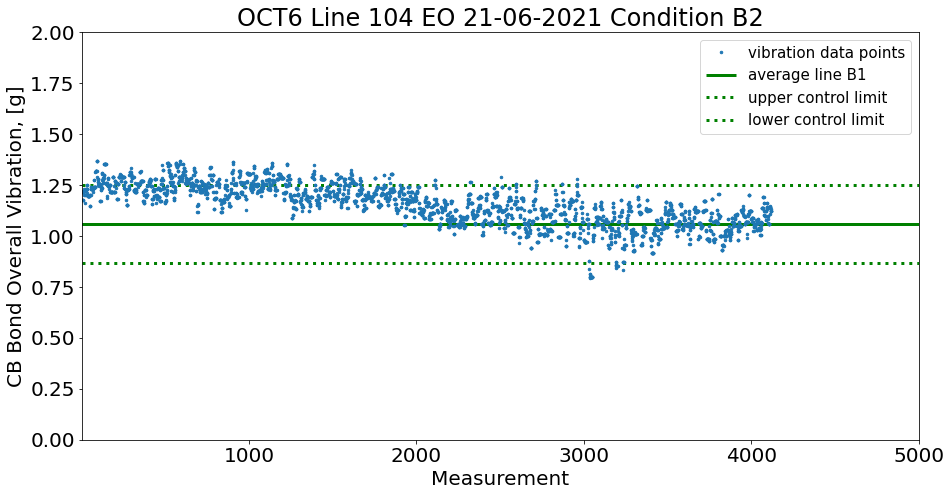

In [171]:
x = B2.index
y = B2['Value (G)']
fig, ax = plt.subplots()
ax.set_xlim(1, 5000)
ax.set_ylim(0, 2)
plt.plot(x, y, '.', markersize=5, label='vibration data points')
#plt.hlines(y=B2['Value (G)'].mean(), xmin=0, xmax=4459, colors='r', linewidths=3, label='average line')
plt.hlines(y=m, xmin=0, xmax=5000, colors='g', linewidths=3, label='average line B1')
plt.hlines(y=ucl, xmin=0, xmax=5000, colors='g', linewidths=3, linestyles='dotted', label='upper control limit')
plt.hlines(y=lcl, xmin=0, xmax=5000, colors='g', linewidths=3, linestyles='dotted', label='lower control limit')

plt.title('OCT6 Line 104 EO 21-06-2021 Condition B2')
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right')

In [172]:
print(B2)
B2.iloc[3000]

                 Series      Time  Value (G)  Value (m/s^2)
0     CB Bond Vibration  09:37:04   1.216569      11.922376
1     CB Bond Vibration  09:37:04   1.216569      11.922376
2     CB Bond Vibration  09:37:04   1.216569      11.922376
3     CB Bond Vibration  09:37:04   1.177771      11.542156
4     CB Bond Vibration  09:37:04   1.177771      11.542156
...                 ...       ...        ...            ...
4115  CB Bond Vibration  09:41:05   1.119945      10.975461
4116  CB Bond Vibration  09:41:05   1.119945      10.975461
4117  CB Bond Vibration  09:41:05   1.119945      10.975461
4118  CB Bond Vibration  09:41:06   1.119945      10.975461
4119  CB Bond Vibration  09:41:06   1.131213      11.085887

[4120 rows x 4 columns]


Series           CB Bond Vibration
Time                      09:39:59
Value (G)                 0.978676
Value (m/s^2)             9.591025
Name: 3000, dtype: object

#### B3 - Low Pressure (0.60)

In [173]:
B3 = df_cb.loc[277759:282000]
B3 = B3.reset_index(drop=True)

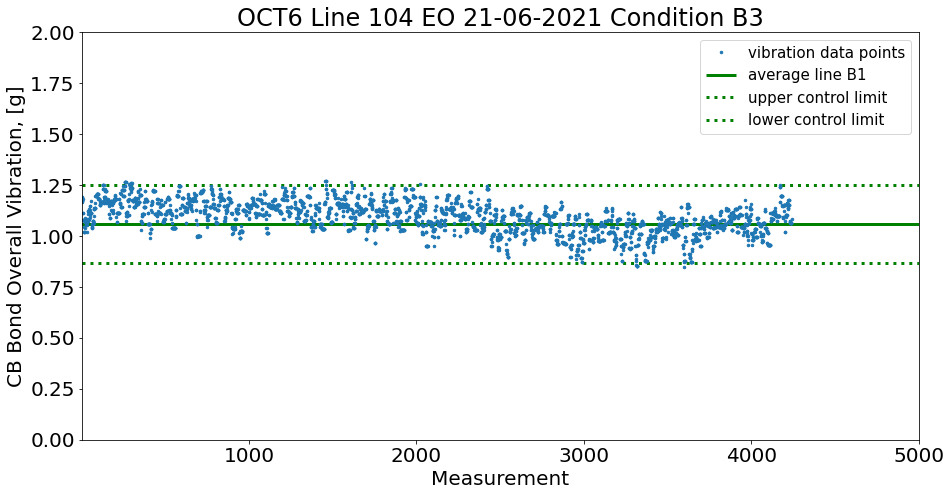

In [174]:
x = B3.index
y = B3['Value (G)']
fig, ax = plt.subplots()
ax.set_xlim(1, 5000)
ax.set_ylim(0, 2)
plt.plot(x, y, '.', markersize=5, label='vibration data points')
#plt.hlines(y=B3['Value (G)'].mean(), xmin=0, xmax=4459, colors='r', linewidths=3, label='average line')
plt.hlines(y=m, xmin=0, xmax=5000, colors='g', linewidths=3, label='average line B1')
plt.hlines(y=ucl, xmin=0, xmax=5000, colors='g', linewidths=3, linestyles='dotted', label='upper control limit')
plt.hlines(y=lcl, xmin=0, xmax=5000, colors='g', linewidths=3, linestyles='dotted', label='lower control limit')

plt.title('OCT6 Line 104 EO 21-06-2021 Condition B3')
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right')

#### B4

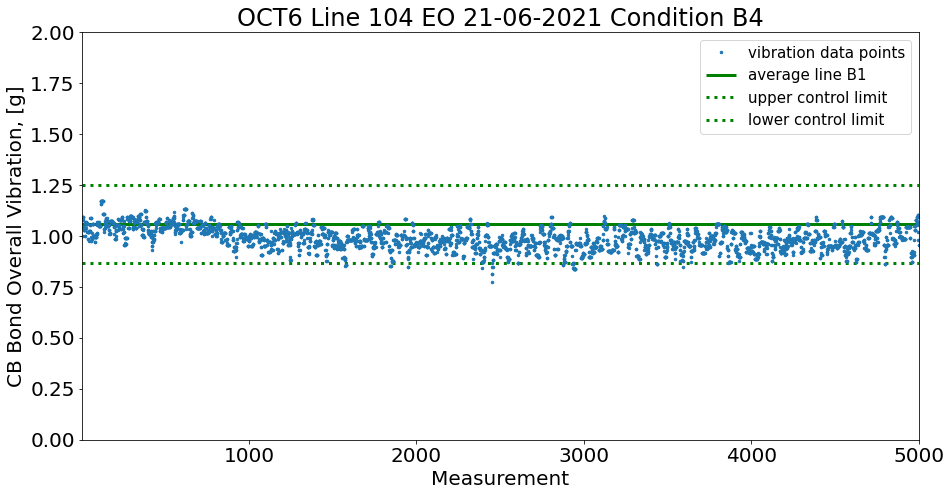

In [175]:
B4 = df_cb.loc[442986:451350]
B4 = B4.reset_index(drop=True)

x = B4.index
y = B4['Value (G)']
fig, ax = plt.subplots()
ax.set_xlim(1, 5000)
ax.set_ylim(0, 2)
plt.hlines(y=m, xmin=0, xmax=8000, colors='g', linewidths=3, label='average line B1')
plt.hlines(y=ucl, xmin=0, xmax=8000, colors='g', linewidths=3, linestyles='dotted', label='upper control limit')
plt.hlines(y=lcl, xmin=0, xmax=8000, colors='g', linewidths=3, linestyles='dotted', label='lower control limit')
plt.plot(x, y, '.', markersize=5, label='vibration data points')

plt.title('OCT6 Line 104 EO 21-06-2021 Condition B4')
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right')

#### B1/2/3 Comparisons

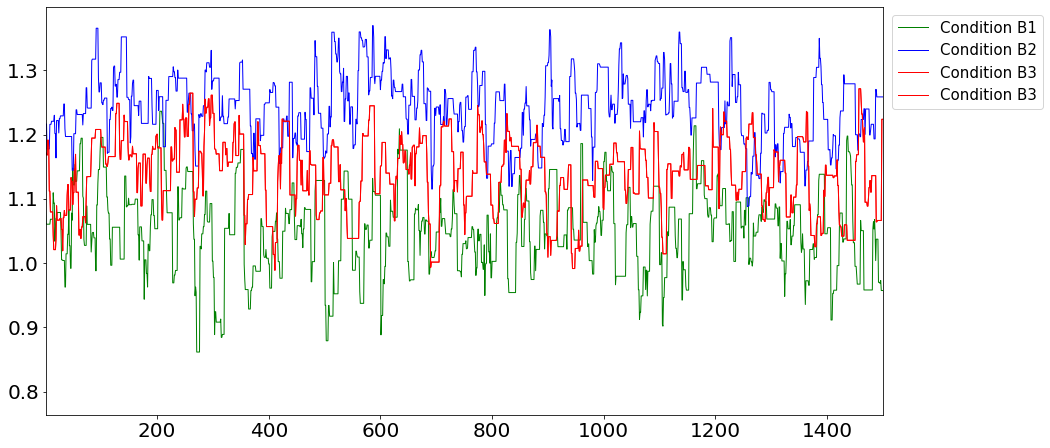

In [176]:
fig, ax = plt.subplots()
#plt.hlines(y=B1['Value (G)'].mean(), xmin=0, xmax=4459, colors='black', linewidths=3, linestyles='dotted')
#plt.hlines(y=B2['Value (G)'].mean(), xmin=0, xmax=4459, colors='r', linewidths=3, linestyles='dotted')
#plt.hlines(y=B3['Value (G)'].mean(), xmin=0, xmax=4459, colors='y', linewidths=3, linestyles='dotted')
ax.set_xlim(1, 1500)
ax = B1['Value (G)'].plot(linewidth='1', color='green', label='Condition B1')
B2['Value (G)'].plot(ax=ax, linewidth='1',  color='blue', label='Condition B2')
B3['Value (G)'].plot(ax=ax, color='r', linewidth='1', label='Condition B3')
B3['Value (G)'].plot(ax=ax, color='r', linewidth='1', label='Condition B3')
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right')


In [177]:
B1['Value (G)'].mean()

1.05815629075144

In [178]:
B2['Value (G)'].mean()

1.1551437412621386

In [179]:
B3['Value (G)'].mean()

1.0908891669024063

In [180]:
B4['Value (G)'].mean()

0.9734156865510996

In [181]:
columns = ['A1 (T)', 'A2', 'A3', 'A4 (T)', 'A5', 'A6', 'A7 (T)', 'A8', 'B1 (T)', 'B2', 'B3', 'B4']
rows = ["Average Vibration in G's"]


The average vibration measurement for condition A1 is:

1.0822821954887212

The average vibration measurement for condition A2 is:

1.1631516164766167

The average vibration measurement for condition A3 is:

1.0916710991735517

The average vibration measurement for condition A4 is:

1.0897216192319108

The average vibration measurement for condition A5 is:

1.1335937549857547

The average vibration measurement for condition A6 is:

1.0897216192319108

The average vibration measurement for condition A7 is:

1.0706211944321733

The average vibration measurement for condition A8 is:

1.0706211944321733

In [182]:
averages = pd.DataFrame(index=rows, columns=columns)

averages['A1 (T)']["Average Vibration in G's"] = 1.08228
averages['A2']["Average Vibration in G's"] = 1.16315
averages['A3']["Average Vibration in G's"] = 1.09167
averages['A4 (T)']["Average Vibration in G's"] = 1.08972
averages['A5']["Average Vibration in G's"] = 1.13359
averages['A6']["Average Vibration in G's"] = 1.08972
averages['A7 (T)']["Average Vibration in G's"] = 1.07062
averages['A8']["Average Vibration in G's"] = 1.07062
averages['B1 (T)']["Average Vibration in G's"] = 1.05815629075144
averages['B2']["Average Vibration in G's"] = 1.1551437412621386
averages['B3']["Average Vibration in G's"] = 1.0908891669024063
averages['B4']["Average Vibration in G's"] = 0.9734156865510996

''

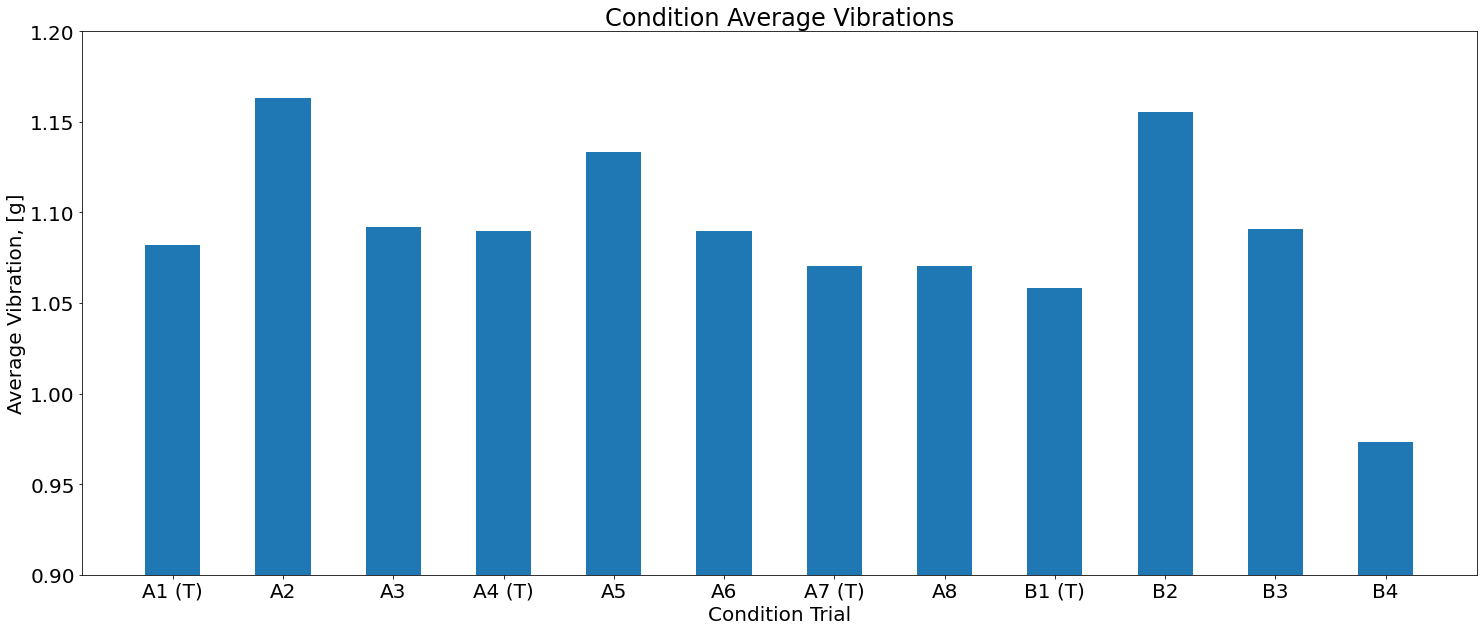

In [183]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

ax.set_xlabel('Condition Trial')
ax.set_ylabel("Average Vibration, [g]")
ax.set_title('Condition Average Vibrations')
ax.set_ylim(0.9, 1.2)

ax.bar(columns, averages.loc["Average Vibration in G's"], width = 0.5)
;